In [1]:
mon_fichier = 'tp_note3_hlma408_gr_C_joseph_salmon.ipynb'

In [2]:
alpha =  len(mon_fichier) / 1000
alpha

0.041

In [3]:
from scipy.stats import norm
norm.ppf(1 - alpha)

1.7391976652852517

In [4]:
import numpy as np
n_samples = 1000


In [5]:
def echantillon_de4df(n_samples):
    return np.ceil(np.random.rand(n_samples) * 4)

In [6]:
from scipy.stats import chi2, chisquare

In [7]:
import pandas as pd
df_des = pd.DataFrame({"tirage": echantillon_de4df(n_samples)})
eff_empirique = df_des.value_counts(echantillon_de4df(n_samples))
print(eff_empirique)

4.0    275
1.0    253
2.0    247
3.0    225
dtype: int64


In [8]:
eff_theorique = np.ones(4) * 0.25 * n_samples

In [9]:
chi2_stat, chi2_pvalue = chisquare(eff_empirique, f_exp=eff_theorique, ddof=0, axis=0)

In [10]:
chi2_stat, chi2_pvalue

(5.072, 0.1666002350747284)

In [11]:
chi2_pvalue> 0.05

True

Conclusion: on valide l'hypothèse car la p-value est tres grande.

Exercice 3

In [12]:
from download import download 
url = 'http://josephsalmon.eu/enseignement/datasets/prairie.txt'
download(url,'./prairie.txt', )

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


'./prairie.txt'

In [13]:
df_prairie = pd.read_csv('prairie.txt', sep="\s+")

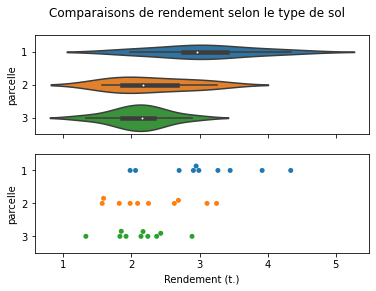

In [14]:
import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(nrows=2, sharex=True)
sns.violinplot(x="rendement", y="parcelle", data=df_prairie, ax=ax[0], orient='h')
sns.swarmplot(x="rendement", y="parcelle",data=df_prairie, ax=ax[1], orient='h')
fig.suptitle("Comparaisons de rendement selon le type de sol")
ax[1].set_xlabel('Rendement (t.)')
ax[0].set_xlabel('')
fig.savefig("swarm_violin.pdf")
plt.show()

In [15]:
echA = np.array([14.4, 14.7, 13.2, 12.1, 18.7, 15.0, 13.3, 17.8, 16.6, 15.0])
echB = np.array([25.6, 17.7, 19.0, 26.7, 22.6, 19.1, 22.9, 21.0, 25.7, 23.7])

In [16]:
diff_mean = (echA.mean() - echB.mean())
print(diff_mean, echA.mean(),  echB.mean())

-7.319999999999997 15.080000000000002 22.4


In [17]:
sigA = np.std(echA, ddof=1)
sigB = np.std(echB, ddof=1)
nA = len(echA)
nB = len(echB)

In [18]:
sig_tot = np.sqrt(sigA**2 / len(echA) + sigB**2 /len(echB) )

In [19]:
from scipy.stats import t, ttest_ind

In [20]:
IC_min = diff_mean + sig_tot * t.ppf(1-alpha / 2, df=np.min([nA-1, nB-1]))
IC_max = diff_mean - sig_tot * t.ppf(1-alpha / 2, df=np.min([nA-1, nB-1]))
print(IC_min, IC_max)

-4.487487058486943 -10.15251294151305


$$
H_0 : "\mu_A = \mu_B" (esperance)\\
H_1 : "\mu_A \neq \mu_B" (esperance)
$$

In [21]:
ttest_ind(echA, echB, equal_var=True)

Ttest_indResult(statistic=-6.159312323000714, pvalue=8.145901431650428e-06)

In [22]:
ttest_ind(echA, echB, equal_var=False)

Ttest_indResult(statistic=-6.159312323000714, pvalue=1.5082683565150463e-05)

Donc au niveau 

In [23]:
alpha

0.041

on rejette H_0

In [24]:
from download import download 
url='http://josephsalmon.eu/enseignement/datasets/Hospit.csv'
download(url,'./Hospit.txt', )


Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


'./Hospit.txt'

In [25]:
df_hospit = pd.read_csv('Hospit.txt', sep=";")

In [26]:
df_hospit

,ID,Mois_hospit,Maladie
0,1,Janvier,A
1,2,Janvier,A
2,3,Juillet,B
3,4,Novembre,A
4,5,Mars,A
...,...,...,...
146,147,Janvier,A
147,148,Juillet,A
148,149,Avril,A
149,150,Fevrier,A


In [27]:
df_maladieA = df_hospit[df_hospit['Maladie']== 'A']

In [28]:
df_months = df_maladieA["Mois_hospit"].value_counts()

In [29]:
df_months

Janvier      18
Fevrier      16
Decembre     13
Novembre     12
Octobre      10
Avril        10
Aout          9
Septembre     9
Mars          8
Mai           6
Juin          5
Juillet       4
Name: Mois_hospit, dtype: int64

In [30]:
df_months.sum()

120

In [31]:
chi2_stat, chi2_pvalue = chisquare(df_months, ddof=0, axis=0)

In [32]:
print(chi2_stat, chi2_pvalue)

19.6 0.051137607840198974


In [33]:
chi2_pvalue > alpha

True

Donc si c'est True, on a une grande pvalue, donc on accepte H_0 : tous les mois identiques... mais on est bordeline quand meme...

In [34]:
from download import download 
url = 'http://josephsalmon.eu/enseignement/datasets/arbres.txt'
download(url,'./arbres.txt')


Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


'./arbres.txt'

In [35]:
df_arbres = pd.read_csv('arbres.txt', "\s+")
df_arbres

,vol,aire
0,0.152,297
1,0.284,595
2,0.187,372
3,0.350,687
4,0.416,790
5,0.230,520
6,0.242,473
7,0.276,585
8,0.383,762
9,0.140,232


In [36]:
df_arbres.sort_values('aire', inplace=True)

In [37]:
import statsmodels.api as sm
df_arbres

,vol,aire
9,0.140,232
0,0.152,297
2,0.187,372
6,0.242,473
5,0.230,520
7,0.276,585
1,0.284,595
3,0.350,687
8,0.383,762
4,0.416,790


In [38]:
df_arbres = sm.add_constant(df_arbres)
model = sm.OLS(df_arbres['vol'], df_arbres[['const', 'aire']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    vol   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     257.2
Date:                Tue, 04 May 2021   Prob (F-statistic):           2.29e-07
Time:                        09:24:00   Log-Likelihood:                 27.418
No. Observations:                  10   AIC:                            -50.84
Df Residuals:                       8   BIC:                            -50.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0052      0.017      0.305      0.7

/home/jsalmon/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)


Parameters:  const    0.005233
aire     0.000491
dtype: float64
R2:  0.9698390398668416


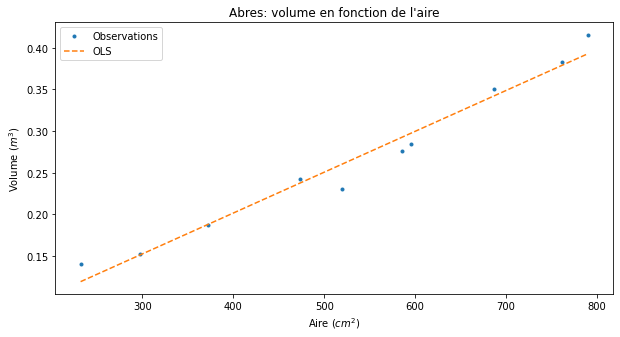

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df_arbres['aire'], df_arbres['vol'], '.', label="Observations")
plt.title("Abres: volume en fonction de l'aire")
plt.xlabel(u'Aire ($cm^2$)')
plt.ylabel(u'Volume ($m^3$)')
plt.plot(df_arbres['aire'],
         results.predict(df_arbres[['const', 'aire']]),'--',
        label="OLS")

plt.legend()

In [41]:
print('R2 / Proportion de vairance expliquée ', results.rsquared)

R2 / Proportion de vairance expliquée  0.9698390398668416


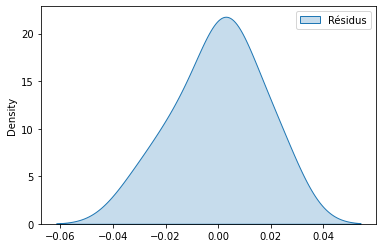

In [42]:
plt.figure()
sns.kdeplot((results.resid -results.resid.mean()/results.resid.std()),
            label="Résidus", shade=True)
plt.legend()

In [43]:
X_to_predict = pd.DataFrame({'const': [1.], 'aire': [500]})
X_to_predict

,const,aire
0,1.0,500


In [44]:
predictions = results.get_prediction(X_to_predict)
df_predictions = predictions.summary_frame(alpha=alpha)
IC_down_etire = df_predictions['mean_ci_lower'].astype(float)
IC_up_etire = df_predictions['mean_ci_upper'].astype(float)

In [45]:
predictions.summary_frame(alpha=alpha)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.250638,0.005597,0.23702,0.264256,0.206077,0.295198


In [46]:
IC_down_concentre = df_predictions['mean_ci_lower'].astype(float)
IC_up_concentre = df_predictions['mean_ci_upper'].astype(float)

In [47]:
print('\n', IC_down_concentre,'\n', IC_up_concentre)


 0    0.23702
Name: mean_ci_lower, dtype: float64 
 0    0.264256
Name: mean_ci_upper, dtype: float64


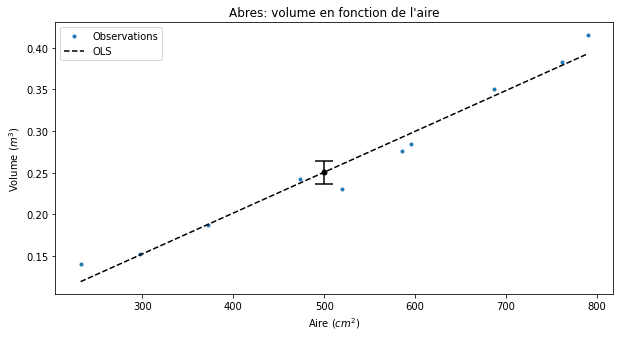

In [48]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(df_arbres['aire'], df_arbres['vol'], '.', label="Observations")
plt.title("Abres: volume en fonction de l'aire")
plt.xlabel(u'Aire ($cm^2$)')
plt.ylabel(u'Volume ($m^3$)')
plt.plot(df_arbres['aire'],
         results.predict(df_arbres[['const', 'aire']]),'--',
         label="OLS", color='k')

plt.legend()
pred_465 = predictions.summary_frame(alpha=alpha)['mean'].iloc[0]
plt.plot(X_to_predict.iloc[0]['aire'], pred_465, '.', label="Observations", ms=10, color='k')

ax.vlines(X_to_predict.iloc[0]['aire'], IC_down_concentre, IC_up_concentre, color='k')
ax.hlines(IC_up_concentre, X_to_predict.iloc[0]['aire'] - 10, X_to_predict.iloc[0]['aire'] + 10, color='k')
ax.hlines(IC_down_concentre, X_to_predict.iloc[0]['aire'] - 10, X_to_predict.iloc[0]['aire'] + 10, color='k')

plt.show()